##**SHETH L.U.J. COLLEGE OF ARTS & SIR M.V. COLLEGE OF SCIENCE & COMMERCE**

**Aim: Adaboost Ensemble Learning
Implement the Adaboost algorithm to create an ensemble of weak classifiers.
Train the ensemble model on a given dataset and evaluate its performance.
Compare the results with individual weak classifiers.**

### **Bhumika Shelar | T114**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load dataset
df = pd.read_csv('/content/sneakers_streetwear_sales_data.csv')
df.shape

(353, 11)

In [ ]:
df.head()

,Date,Product Name,Product Type,Brand,Gender,Category,Country,Quantity,Unit Price ($),Amount ($),Payment Mode
0,2022-05-27,Fear of God Essentials Tee,T-shirt,Essentials,Unisex,Limited Edition,Japan,5,141.82,709.10,Card
1,2022-08-22,Yeezy Boost 350,Sneakers,Adidas,Unisex,Streetwear,USA,2,267.34,534.68,Cash on Delivery
2,2022-04-03,Nike Dunk Low,Sneakers,Nike,Women,Limited Edition,Germany,1,292.00,292.00,Cash on Delivery
3,2022-07-13,Nike Tech Fleece,Hoodie,Nike,Men,Limited Edition,USA,4,245.44,981.76,Cash on Delivery
4,2022-08-25,Jordan 1 High,Sneakers,Nike,Women,Casual,Australia,2,184.51,369.02,Cash on Delivery


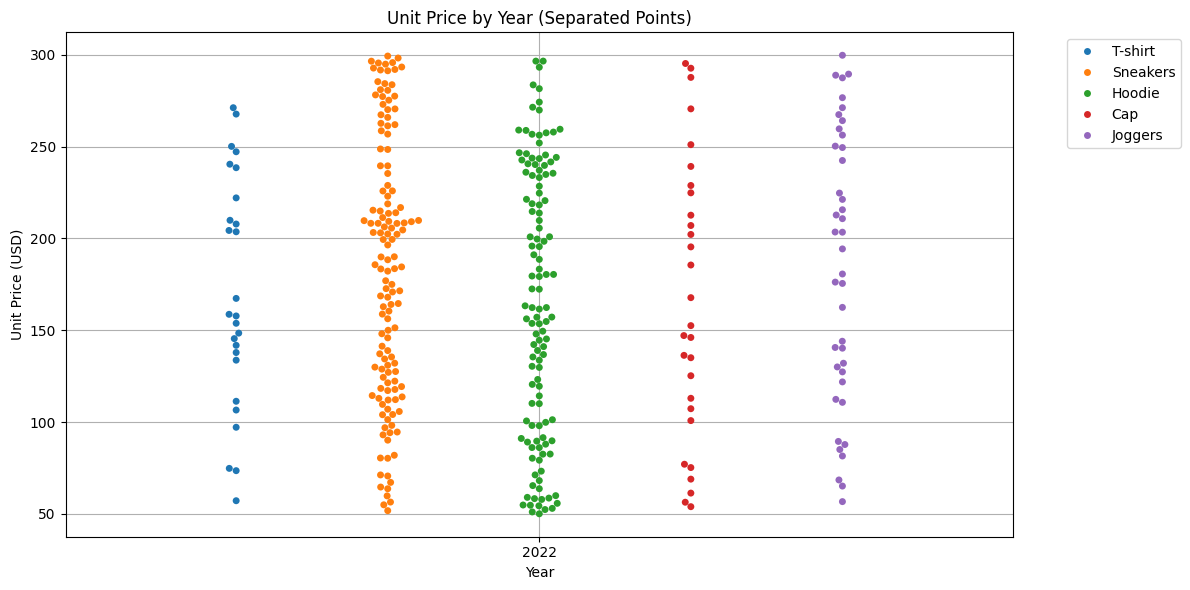

In [ ]:
plt.figure(figsize=(12, 6))
sns.swarmplot(data=df, x='Year', y='Unit Price ($)', hue='Product Type', dodge=True)

plt.title('Unit Price by Year (Separated Points)')
plt.xlabel('Year')
plt.ylabel('Unit Price (USD)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
df['price'] = df['Unit Price ($)']

# Split features and target
X = df.drop(['price', 'Unit Price ($)', 'Amount ($)', 'Date'], axis=1)
y = df['price']

In [ ]:
#Separate numeric and categorical columns
cat_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()
num_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

In [ ]:
#encode categorical columns
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
X_cat_encoded = encoder.fit_transform(X[cat_cols])
cat_feature_names = encoder.get_feature_names_out(cat_cols)

In [ ]:
# Scale numeric features
scaler = StandardScaler()
X_num_scaled = scaler.fit_transform(X[num_cols])

# Combine numeric and categorical features
X_processed = np.concatenate([X_num_scaled, X_cat_encoded], axis=1)

In [ ]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

# Define weak regressor
weak_reg = DecisionTreeRegressor(max_depth=1, random_state=42)

In [ ]:
# Train AdaBoost regressor
ada_reg = AdaBoostRegressor(estimator=weak_reg, n_estimators=100, random_state=42)
ada_reg.fit(X_train, y_train)

# Predict
y_pred = ada_reg.predict(X_test)

In [ ]:
#  Evaluate
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"AdaBoost Regressor MSE: {mse:.2f}")
print(f"AdaBoost Regressor R² Score: {r2:.3f}")

AdaBoost Regressor MSE: 5507.30
AdaBoost Regressor R² Score: 0.011
